In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
# Load the data
df = pd.read_csv("integrated_data_egy_2021.csv")
print(df.shape)
df

(137255, 13)


,longitude,latitude,light_intensity,geometry,index_right,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,country,quarter
0,34.554168,31.670833,0,POINT (34.554168383100006 31.6708329867),3100384.0,1.221300e+15,186024.0,50959.0,7.0,30.0,14.0,E.G.Y,Q1
1,34.558335,31.670833,0,POINT (34.55833504980001 31.6708329867),3100385.0,1.221300e+15,187855.0,33403.0,10.0,74.0,19.0,E.G.Y,Q1
2,34.562502,31.670833,0,POINT (34.56250171650001 31.6708329867),3100385.0,1.221300e+15,187855.0,33403.0,10.0,74.0,19.0,E.G.Y,Q1
3,34.566668,31.670833,0,POINT (34.56666838320001 31.6708329867),3100391.0,1.221300e+15,100145.0,22133.0,12.0,99.0,22.0,E.G.Y,Q1
4,34.570835,31.670833,0,POINT (34.57083504990001 31.6708329867),3100392.0,1.221300e+15,254579.0,60568.0,6.0,65.0,19.0,E.G.Y,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137250,31.612502,22.354166,196,POINT (31.612501692900008 22.3541662455),3204587.0,1.221233e+15,2795.0,814.0,39.0,1.0,1.0,E.G.Y,Q4
137251,31.616668,22.350000,196,POINT (31.61666835960001 22.3499995788),3204588.0,1.221233e+15,19370.0,776.0,42.0,2.0,1.0,E.G.Y,Q4
137252,31.616668,22.345833,196,POINT (31.61666835960001 22.3458329121),3204588.0,1.221233e+15,19370.0,776.0,42.0,2.0,1.0,E.G.Y,Q4
137253,31.616668,22.341666,196,POINT (31.61666835960001 22.3416662454),3204589.0,1.221233e+15,23701.0,16044.0,49.0,2.0,2.0,E.G.Y,Q4


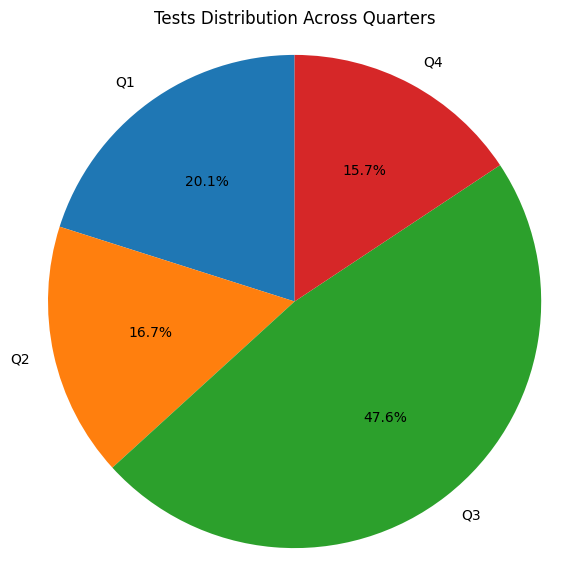

In [41]:
# Group the data by 'quarter' and sum the 'tests' in each quarter
quarter_tests = df.groupby('quarter')['tests'].sum()

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(quarter_tests, labels=quarter_tests.index, autopct='%1.1f%%', startangle=90)
plt.title('Tests Distribution Across Quarters')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


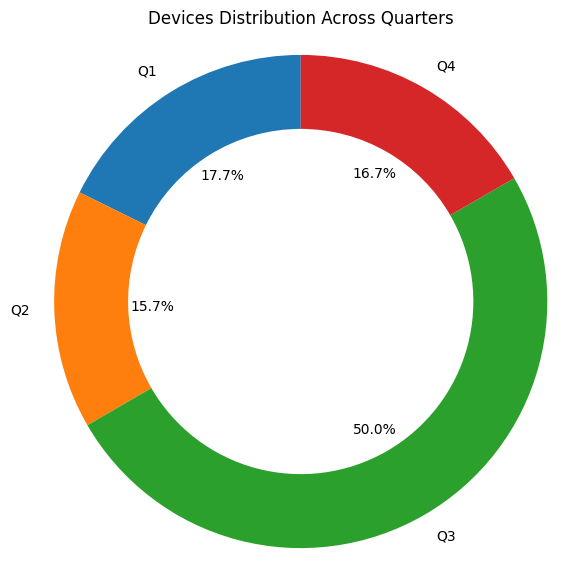

In [42]:
# Group the data by 'quarter' and sum the 'tests' in each quarter
quarter_tests = df.groupby('quarter')['devices'].sum()

# Plot the donut pie chart
plt.figure(figsize=(7, 7))
plt.pie(quarter_tests, labels=quarter_tests.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})
plt.title('Devices Distribution Across Quarters')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


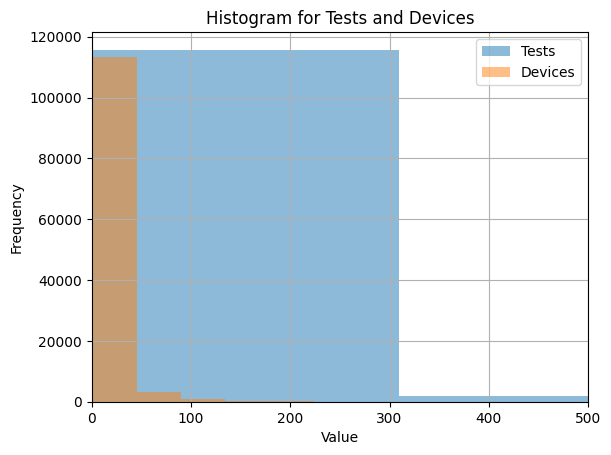

In [46]:
# Plot histograms for 'tests' and 'devices' columns with alpha for transparency
df['tests'].hist(alpha=0.5, label='Tests')
df['devices'].hist(alpha=0.5, label='Devices')

# Set the x-axis limit to 500
plt.xlim(0, 500)

# Add labels and title for clarity
plt.title('Histogram for Tests and Devices')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the legend to differentiate the histograms
plt.legend()

# Display the plot
plt.show()


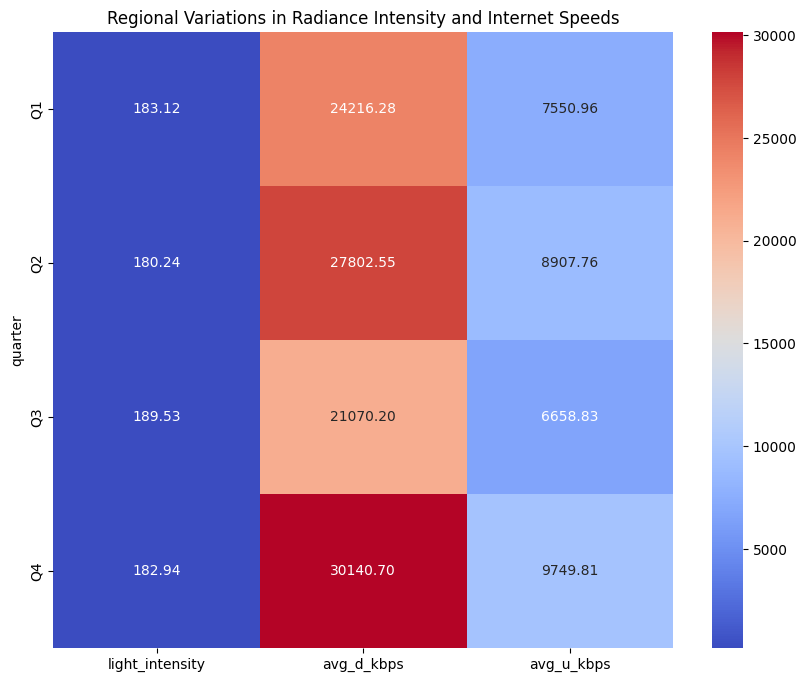

In [4]:
heatmap_data = df.groupby('quarter')[['light_intensity', 'avg_d_kbps', 'avg_u_kbps']].mean()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Regional Variations in Radiance Intensity and Internet Speeds")
plt.show()

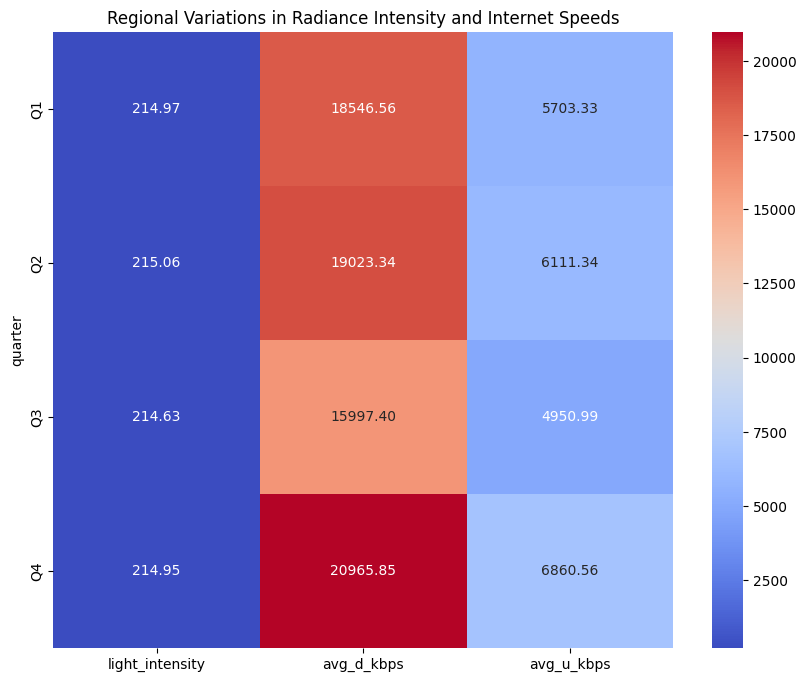

In [5]:
# Filter rows where light intensity is not zero
filtered_df = df[df['light_intensity'] != 0]

# Group by 'quarter' and calculate the mean of the relevant columns
heatmap_data = filtered_df.groupby('quarter')[['light_intensity', 'avg_d_kbps', 'avg_u_kbps']].mean()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Regional Variations in Radiance Intensity and Internet Speeds")
plt.show()


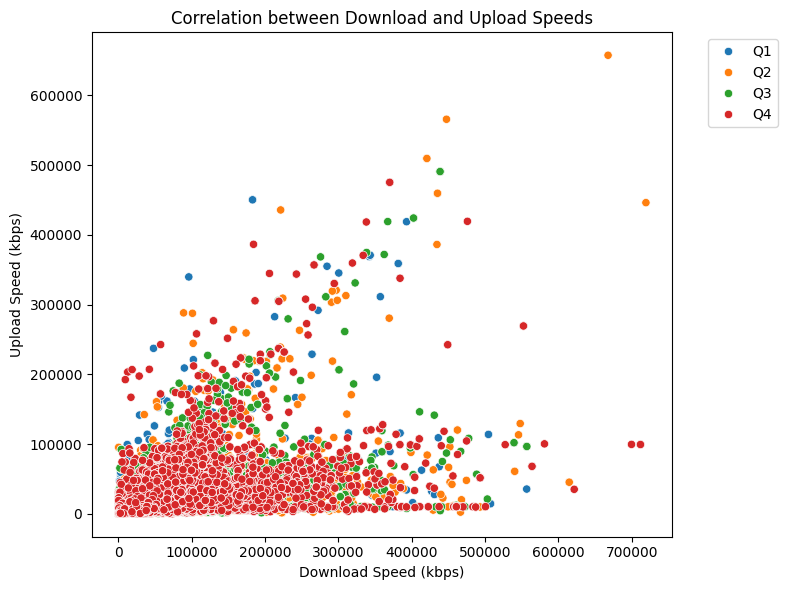

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_d_kbps', y='avg_u_kbps', hue='quarter', data=df)
plt.title("Correlation between Download and Upload Speeds")
plt.xlabel("Download Speed (kbps)")
plt.ylabel("Upload Speed (kbps)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

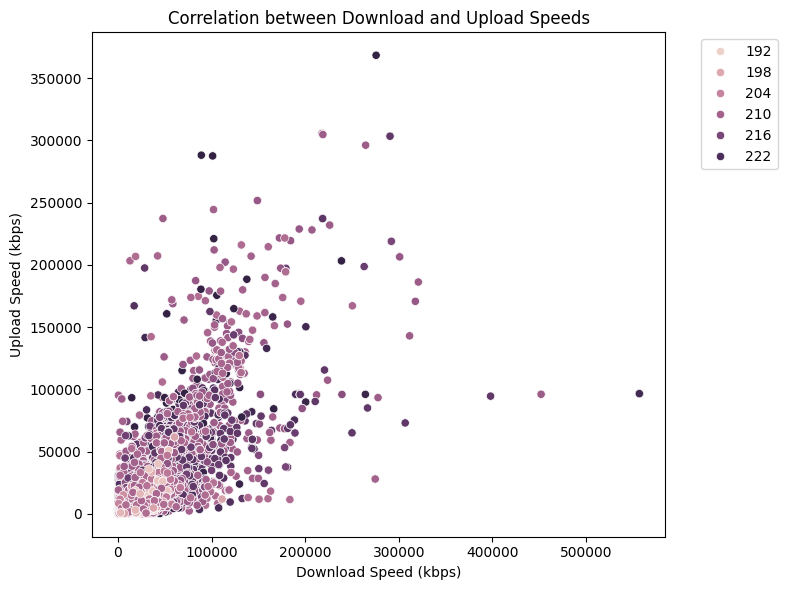

In [10]:
# Remove rows with zeros in 'light_intensity'
filtered_df = df.query("light_intensity != 0")

# Plot the scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_d_kbps', y='avg_u_kbps', hue='light_intensity', data=filtered_df)
plt.title("Correlation between Download and Upload Speeds")
plt.xlabel("Download Speed (kbps)")
plt.ylabel("Upload Speed (kbps)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


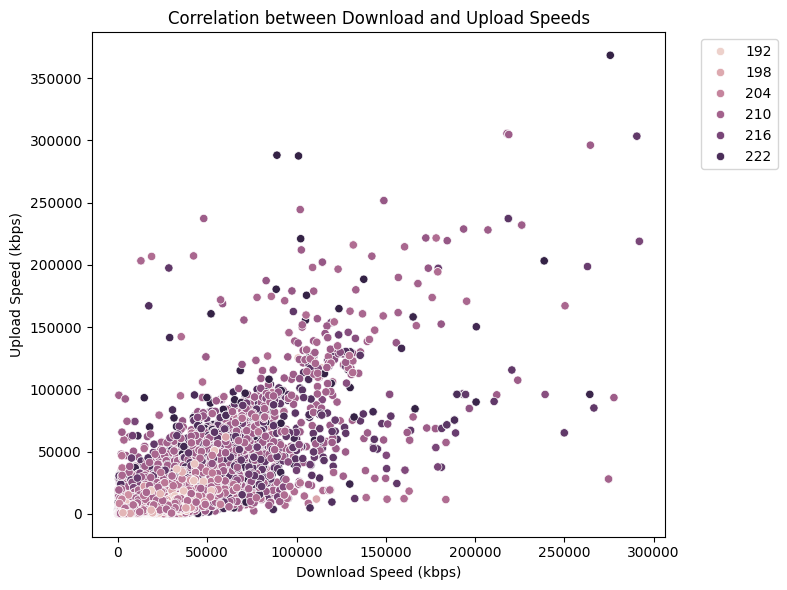

In [12]:
# Remove rows with zeros in 'light_intensity' and limit 'avg_d_kbps' to 400,000
filtered_df = df.query("light_intensity != 0 and avg_d_kbps <= 300000")

# Plot the scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_d_kbps', y='avg_u_kbps', hue='light_intensity', data=filtered_df)
plt.title("Correlation between Download and Upload Speeds")
plt.xlabel("Download Speed (kbps)")
plt.ylabel("Upload Speed (kbps)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


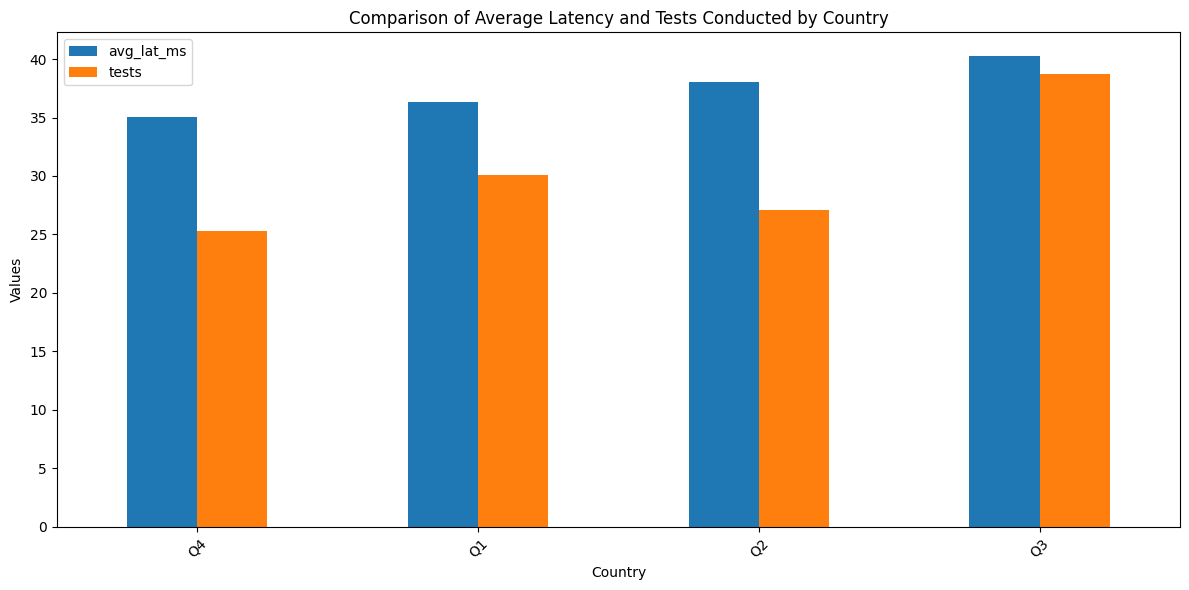

In [13]:
bar_data = df.groupby('quarter')[['avg_lat_ms', 'tests']].mean().sort_values(by='avg_lat_ms')
bar_data.plot(kind='bar', figsize=(12, 6))
plt.title("Comparison of Average Latency and Tests Conducted by Country")
plt.xlabel("Country")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

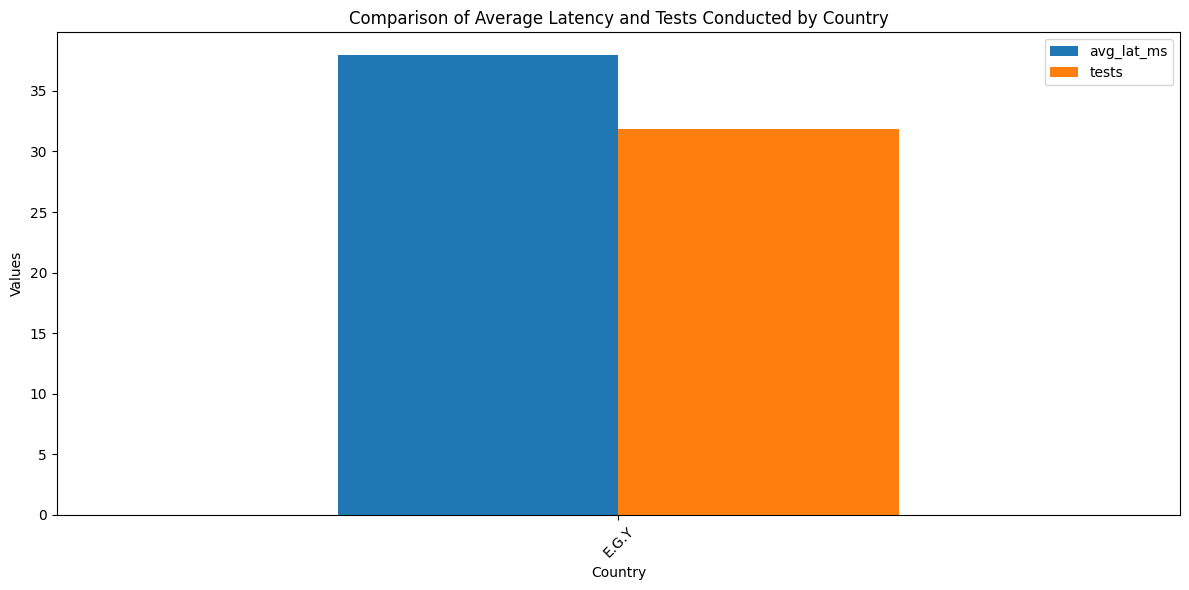

In [14]:
bar_data = df.groupby('country')[['avg_lat_ms', 'tests']].mean().sort_values(by='avg_lat_ms')
bar_data.plot(kind='bar', figsize=(12, 6))
plt.title("Comparison of Average Latency and Tests Conducted by Country")
plt.xlabel("Country")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

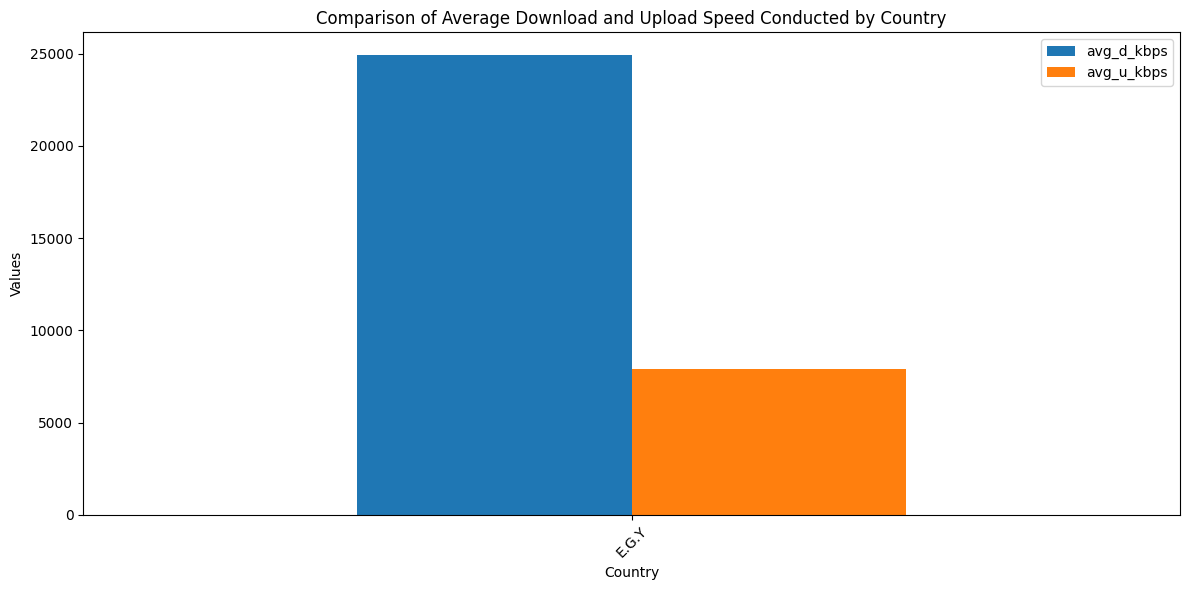

In [17]:
bar_data = df.groupby('country')[['avg_d_kbps', 'avg_u_kbps']].mean().sort_values(by='avg_u_kbps')
bar_data.plot(kind='bar', figsize=(12, 6))
plt.title("Comparison of Average Download and Upload Speed Conducted by Country")
plt.xlabel("Country")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Smart city regions file not found. Creating a simple example region...


C:\Users\mousa\AppData\Local\Temp\ipykernel_4476\4243014153.py:50: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title='Categories', loc='upper left')


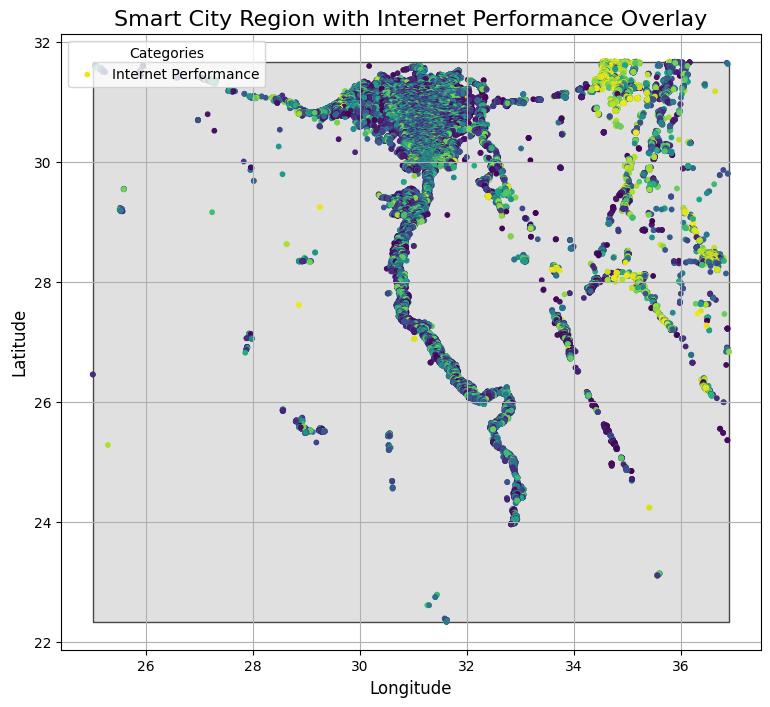

In [18]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon


data = df

# Convert the dataset to a GeoDataFrame
data['geometry'] = data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf_data = gpd.GeoDataFrame(data, geometry='geometry', crs="EPSG:4326")  # Set CRS to WGS84

# Create a fallback rectangular region based on dataset bounds
print("Smart city regions file not found. Creating a simple example region...")
example_region = Polygon([
    (data['longitude'].min(), data['latitude'].min()),
    (data['longitude'].max(), data['latitude'].min()),
    (data['longitude'].max(), data['latitude'].max()),
    (data['longitude'].min(), data['latitude'].max()),
    (data['longitude'].min(), data['latitude'].min()),
])
regions_gdf = gpd.GeoDataFrame({'geometry': [example_region]}, crs="EPSG:4326")

# Ensure both GeoDataFrames are in the same CRS
if gdf_data.crs != regions_gdf.crs:
    gdf_data = gdf_data.to_crs(regions_gdf.crs)

# Plot the overlay
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the smart city regions
regions_gdf.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.7, label='Smart City Region')

# Plot the internet performance data
# Example: Use avg_d_kbps_category for color-coding
gdf_data.plot(
    ax=ax,
    column='avg_d_kbps',
    categorical=True,
    legend=True,
    markersize=10,
    cmap='viridis',
    label='Internet Performance'
)

# Add titles and labels
plt.title('Smart City Region with Internet Performance Overlay', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Categories', loc='upper left')
plt.grid(True)

# Save or show the map
plt.savefig('smart_city_overlay.png', dpi=300, bbox_inches='tight')
plt.show()



--- Descriptive Statistics for Internet Performance ---
count    137255.000000
mean      24904.835722
std       36596.543866
min           5.000000
25%        9249.000000
50%       17015.000000
75%       25988.500000
max      719245.000000
Name: avg_d_kbps, dtype: float64

Smart city regions file not found. Creating a simple example region...

Clustering Results:
   longitude   latitude  cluster
0  34.554168  31.670833        3
1  34.558335  31.670833        3
2  34.562502  31.670833        3
3  34.566668  31.670833        3
4  34.570835  31.670833        3


C:\Users\mousa\AppData\Local\Temp\ipykernel_4476\1762853010.py:62: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title='Clusters', loc='upper left')


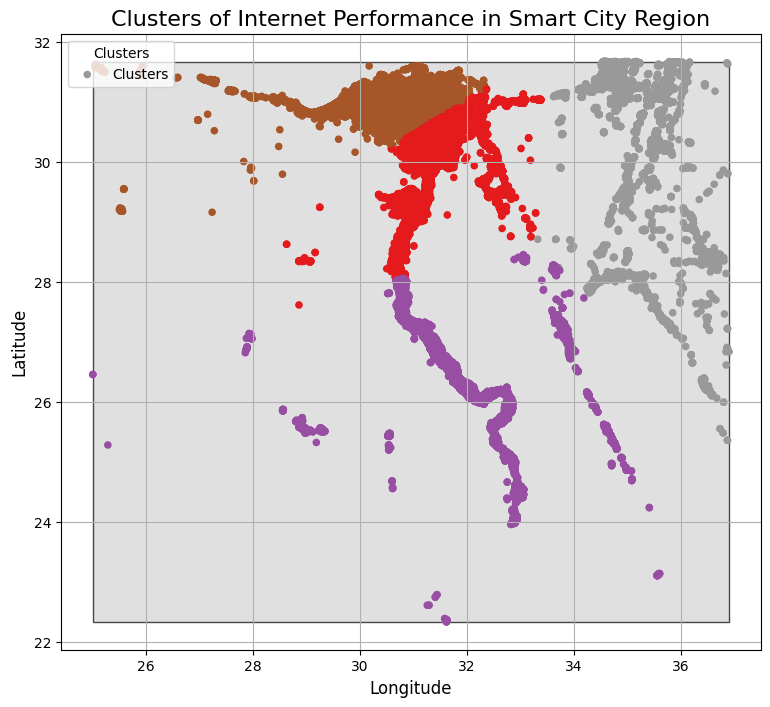

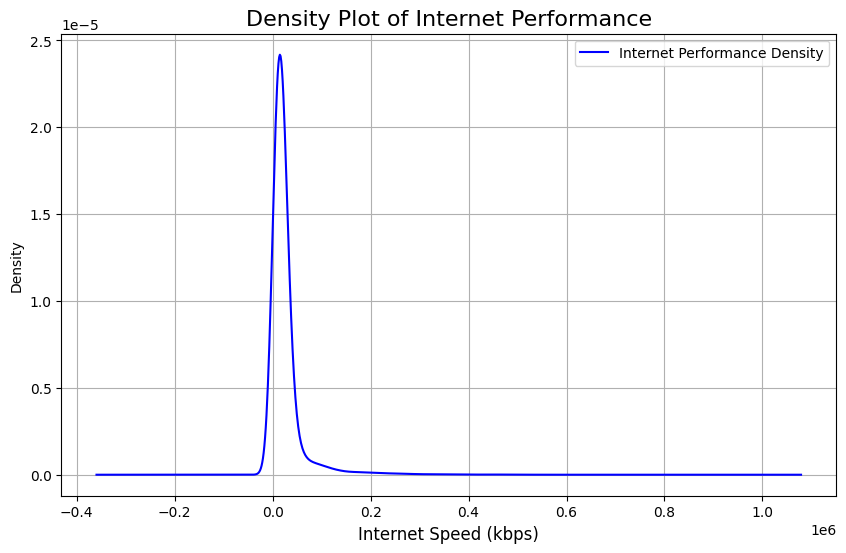

Interactive map saved as 'interactive_smart_city_map.html'.


In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster

# Load the dataset (assuming 'df' is your DataFrame)
data = df.copy()

# Validate data
if data.isnull().any().any():
    print("Warning: Missing values detected. Filling missing data with mean values.")
    data.fillna(data.mean(numeric_only=True), inplace=True)

# Convert to GeoDataFrame
data['geometry'] = data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf_data = gpd.GeoDataFrame(data, geometry='geometry', crs="EPSG:4326")  # WGS84 CRS

# Add descriptive statistics for internet performance
print("\n--- Descriptive Statistics for Internet Performance ---")
print(data['avg_d_kbps'].describe())

# Create a fallback rectangular region based on dataset bounds
print("\nSmart city regions file not found. Creating a simple example region...")
example_region = Polygon([
    (data['longitude'].min(), data['latitude'].min()),
    (data['longitude'].max(), data['latitude'].min()),
    (data['longitude'].max(), data['latitude'].max()),
    (data['longitude'].min(), data['latitude'].max()),
    (data['longitude'].min(), data['latitude'].min()),
])
regions_gdf = gpd.GeoDataFrame({'geometry': [example_region]}, crs="EPSG:4326")

# Ensure both GeoDataFrames are in the same CRS
if gdf_data.crs != regions_gdf.crs:
    gdf_data = gdf_data.to_crs(regions_gdf.crs)

# Apply clustering to detect spatial patterns in internet performance
kmeans = KMeans(n_clusters=4, random_state=42)
gdf_data['cluster'] = kmeans.fit_predict(gdf_data[['longitude', 'latitude']])
print("\nClustering Results:")
print(gdf_data[['longitude', 'latitude', 'cluster']].head())

# Plot static map with clusters
fig, ax = plt.subplots(figsize=(12, 8))
regions_gdf.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.7, label='Smart City Region')
gdf_data.plot(
    ax=ax,
    column='cluster',
    categorical=True,
    legend=True,
    markersize=20,
    cmap='Set1',
    label='Clusters'
)
plt.title('Clusters of Internet Performance in Smart City Region', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.legend(title='Clusters', loc='upper left')
plt.savefig('clusters_smart_city.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot density of internet performance
fig, ax = plt.subplots(figsize=(10, 6))
gdf_data['avg_d_kbps'].plot.kde(ax=ax, bw_method=0.3, color='blue', label='Internet Performance Density')
plt.title('Density Plot of Internet Performance', fontsize=16)
plt.xlabel('Internet Speed (kbps)', fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig('internet_density_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Create interactive map with Folium
m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

for _, row in gdf_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Speed: {row['avg_d_kbps']} kbps, Cluster: {row['cluster']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# Add the smart city region as a polygon
folium.GeoJson(
    example_region,
    name='Smart City Region',
    style_function=lambda x: {'color': 'black', 'weight': 2, 'fillColor': 'gray', 'fillOpacity': 0.3}
).add_to(m)

# Save and display the interactive map
m.save('interactive_smart_city_map.html')
print("Interactive map saved as 'interactive_smart_city_map.html'.")



Descriptive Statistics by Country:
        light_intensity                                                    \
                  count        mean       std    min    25%    50%    75%   
quarter                                                                     
Q1              25044.0  214.973766  6.662909  192.0  211.0  212.0  221.0   
Q2              22999.0  215.059133  6.655838  192.0  211.0  212.0  221.0   
Q3              46759.0  214.631194  7.210256  192.0  210.0  212.0  221.0   
Q4              23371.0  214.946900  6.602515  192.0  211.0  212.0  220.0   

               avg_d_kbps                ...                     avg_u_kbps  \
           max      count          mean  ...       75%       max      count   
quarter                                  ...                                  
Q1       226.0    25044.0  18546.564047  ...  24608.25  192976.0    25044.0   
Q2       226.0    22999.0  19023.339971  ...  24364.00  451970.0    22999.0   
Q3       226.0    46759.0  15

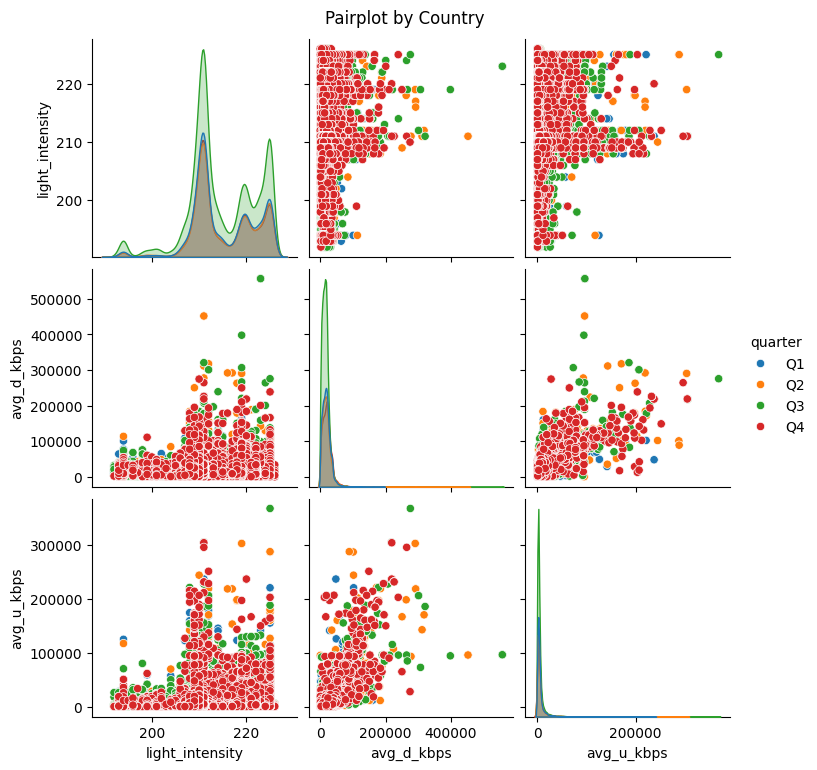

In [22]:
# Filter data where light intensity is not zero
filtered_data = df[(df['light_intensity'] != 0)]

# Drop any rows with NaN values in the relevant columns
filtered_data = filtered_data.dropna(subset=['light_intensity', 'avg_d_kbps', 'avg_u_kbps'])

# Descriptive statistics for relevant variables
print("\nDescriptive Statistics by Country:")
print(filtered_data.groupby('quarter')[['light_intensity', 'avg_d_kbps', 'avg_u_kbps']].describe())

# Visualizations for the Null Hypothesis
sns.pairplot(filtered_data, hue='quarter', vars=['light_intensity', 'avg_d_kbps', 'avg_u_kbps'])
plt.suptitle("Pairplot by Country", y=1.02)
plt.show()

# Hypothesis testing using Spearman correlation
correlation_download, p_value_download = spearmanr(filtered_data['light_intensity'], filtered_data['avg_d_kbps'])
correlation_upload, p_value_upload = spearmanr(filtered_data['light_intensity'], filtered_data['avg_u_kbps'])



Spearman Correlation Results for Egypt:
Light Intensity vs. Download Speed: Correlation = -0.06, P-value = 0.00000
Light Intensity vs. Upload Speed: Correlation = -0.10, P-value = 0.00000
Egypt: Alternative Hypothesis Accepted: Significant correlation between light intensity and download speeds.
Egypt: Alternative Hypothesis Accepted: Significant correlation between light intensity and upload speeds.


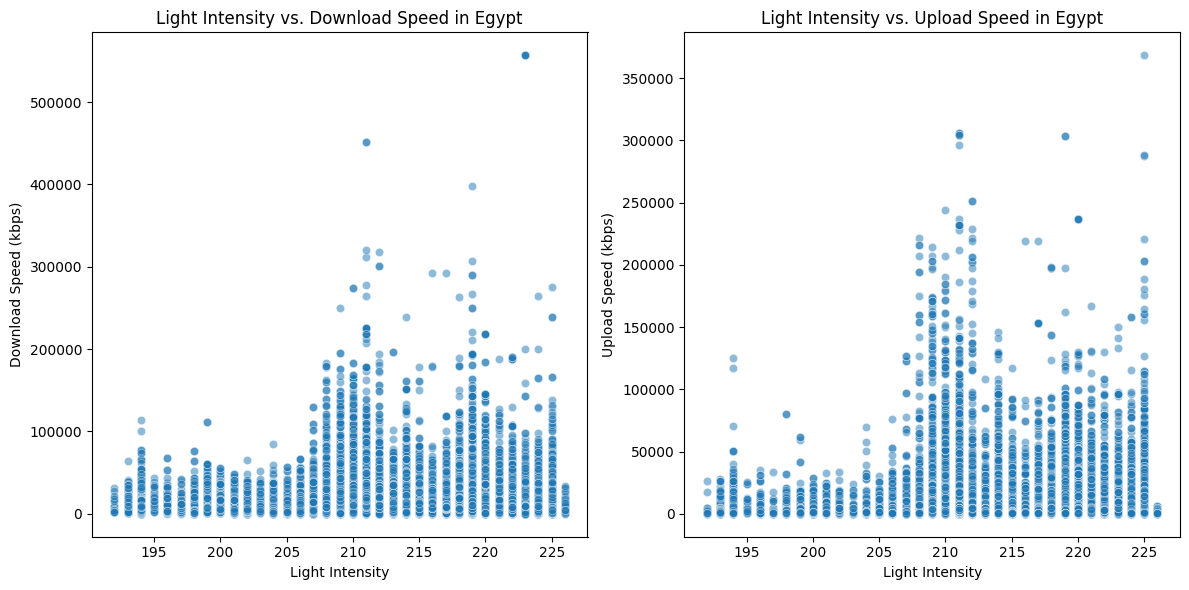

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Filter out rows where light_intensity equals zero
filtered_data = filtered_data[filtered_data['light_intensity'] != 0]

# Filter data for Egypt only
egypt_data = filtered_data

# Calculate Spearman correlation for Egypt
correlation_download, p_value_download = spearmanr(egypt_data['light_intensity'], egypt_data['avg_d_kbps'])
correlation_upload, p_value_upload = spearmanr(egypt_data['light_intensity'], egypt_data['avg_u_kbps'])

print(f"\nSpearman Correlation Results for Egypt:")
print(f"Light Intensity vs. Download Speed: Correlation = {correlation_download:.2f}, P-value = {p_value_download:.5f}")
print(f"Light Intensity vs. Upload Speed: Correlation = {correlation_upload:.2f}, P-value = {p_value_upload:.5f}")

# Interpretation for the Alternative Hypothesis for Egypt
if p_value_download < 0.05:
    print(f"Egypt: Alternative Hypothesis Accepted: Significant correlation between light intensity and download speeds.")
else:
    print(f"Egypt: Alternative Hypothesis Rejected: No significant correlation between light intensity and download speeds.")

if p_value_upload < 0.05:
    print(f"Egypt: Alternative Hypothesis Accepted: Significant correlation between light intensity and upload speeds.")
else:
    print(f"Egypt: Alternative Hypothesis Rejected: No significant correlation between light intensity and upload speeds.")

# Additional visualizations for the Alternative Hypothesis for Egypt
# Scatterplot for Light Intensity vs Download Speed in Egypt
plt.figure(figsize=(12, 6))

# Scatterplot for Light Intensity vs Download Speed
plt.subplot(1, 2, 1)
sns.scatterplot(x='light_intensity', y='avg_d_kbps', data=egypt_data, alpha=0.5)
plt.title("Light Intensity vs. Download Speed in Egypt")
plt.xlabel("Light Intensity")
plt.ylabel("Download Speed (kbps)")

# Scatterplot for Light Intensity vs Upload Speed
plt.subplot(1, 2, 2)
sns.scatterplot(x='light_intensity', y='avg_u_kbps', data=egypt_data, alpha=0.5)
plt.title("Light Intensity vs. Upload Speed in Egypt")
plt.xlabel("Light Intensity")
plt.ylabel("Upload Speed (kbps)")

plt.tight_layout()
plt.show()



Download Speed Prediction Performance:
MAE: 9403.13
RMSE: 14593.29
R²: 0.02

Upload Speed Prediction Performance:
MAE: 5393.46
RMSE: 11612.89
R²: 0.01


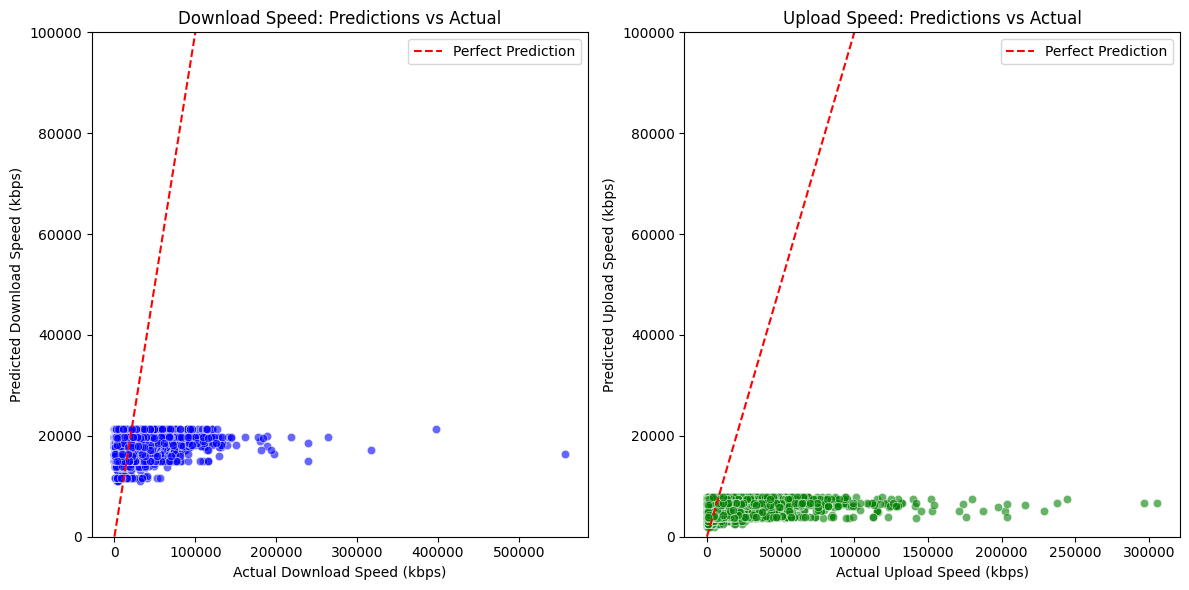

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the data

# Filter data to remove rows with missing values and rows where download/upload speed is zero
filtered_data = df.dropna(subset=['light_intensity', 'avg_d_kbps', 'avg_u_kbps'])
filtered_data = filtered_data[(filtered_data['avg_d_kbps'] != 0) & (filtered_data['avg_u_kbps'] != 0)]

# Define feature set (X) and target variables (y)
X = filtered_data[['light_intensity']]  # Only 'light_intensity' is used as a feature
y_download = filtered_data['avg_d_kbps']
y_upload = filtered_data['avg_u_kbps']

# Split data into training and testing sets
X_train, X_test, y_train_d, y_test_d = train_test_split(X, y_download, test_size=0.2, random_state=42)
_, _, y_train_u, y_test_u = train_test_split(X, y_upload, test_size=0.2, random_state=42)

# Train Random Forest Regressor for download speed
rf_download = RandomForestRegressor(random_state=42, n_estimators=100)
rf_download.fit(X_train, y_train_d)

# Train Random Forest Regressor for upload speed
rf_upload = RandomForestRegressor(random_state=42, n_estimators=100)
rf_upload.fit(X_train, y_train_u)

# Make predictions
y_pred_d = rf_download.predict(X_test)
y_pred_u = rf_upload.predict(X_test)

# Evaluate the model for download speed
print("\nDownload Speed Prediction Performance:")
print(f"MAE: {mean_absolute_error(y_test_d, y_pred_d):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_d, y_pred_d)):.2f}")
print(f"R²: {r2_score(y_test_d, y_pred_d):.2f}")

# Evaluate the model for upload speed
print("\nUpload Speed Prediction Performance:")
print(f"MAE: {mean_absolute_error(y_test_u, y_pred_u):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_u, y_pred_u)):.2f}")
print(f"R²: {r2_score(y_test_u, y_pred_u):.2f}")

# Visualize predictions vs actual values
plt.figure(figsize=(12, 6))

# Download speed predictions
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_d, y=y_pred_d, alpha=0.6, color='blue')
plt.plot([y_test_d.min(), y_test_d.max()], [y_test_d.min(), y_test_d.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Download Speed (kbps)")
plt.ylabel("Predicted Download Speed (kbps)")
plt.title("Download Speed: Predictions vs Actual")
plt.ylim(0, 100000)  # Set y-axis limit to 100,000
plt.legend()

# Upload speed predictions
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_u, y=y_pred_u, alpha=0.6, color='green')
plt.plot([y_test_u.min(), y_test_u.max()], [y_test_u.min(), y_test_u.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Upload Speed (kbps)")
plt.ylabel("Predicted Upload Speed (kbps)")
plt.title("Upload Speed: Predictions vs Actual")
plt.ylim(0, 100000)  # Set y-axis limit to 100,000
plt.legend()

plt.tight_layout()
plt.show()


Download Speed Prediction Performance:
MAE: 9180.16
RMSE: 13077.81
R²: 0.02

Upload Speed Prediction Performance:
MAE: 4952.98
RMSE: 9267.24
R²: 0.02


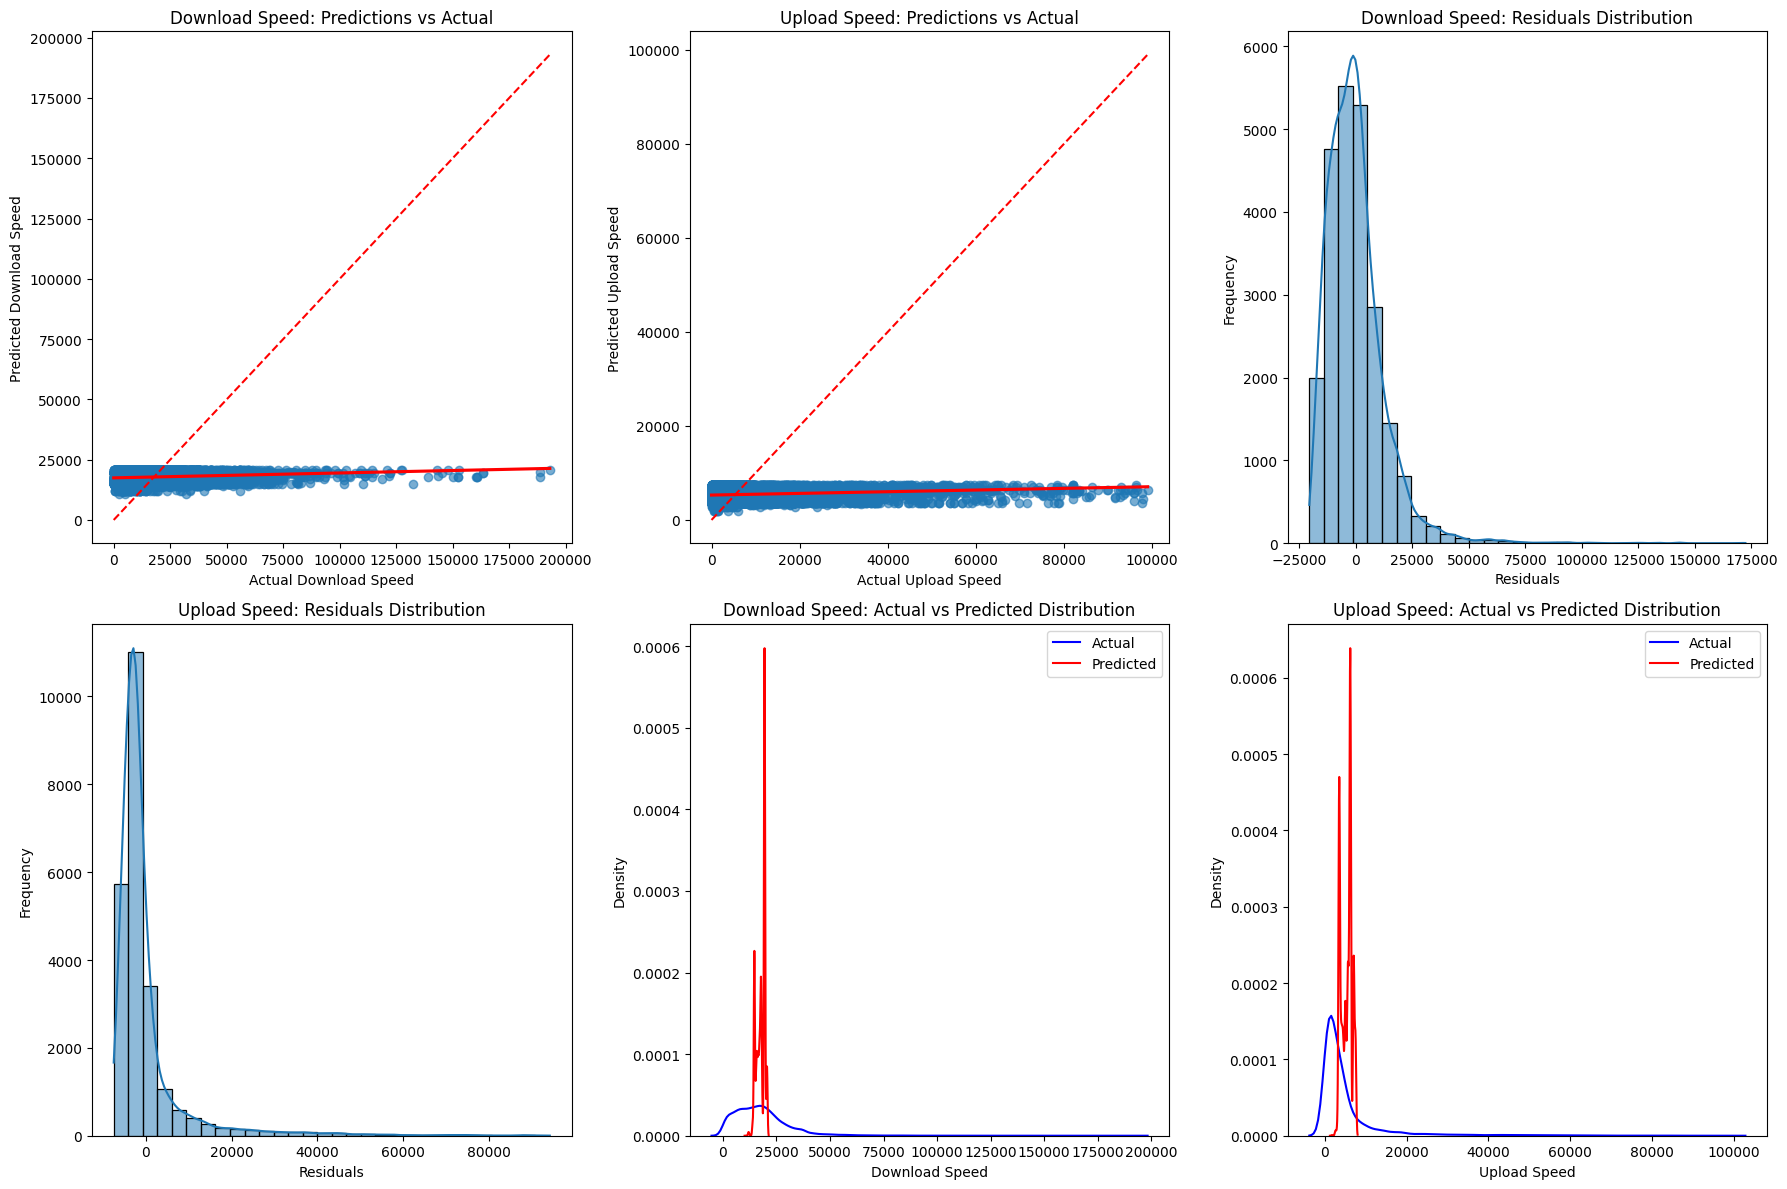

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the data

# Filter data to remove rows with missing values in critical columns
filtered_data = df.dropna(subset=['light_intensity', 'avg_d_kbps', 'avg_u_kbps'])

# Define the range for analysis
download_range = (0, 200000)  # Example range for download speed
upload_range = (0, 100000)    # Example range for upload speed

# Filter data within the specified range
filtered_data = filtered_data[
    (filtered_data['avg_d_kbps'] >= download_range[0]) & (filtered_data['avg_d_kbps'] <= download_range[1]) &
    (filtered_data['avg_u_kbps'] >= upload_range[0]) & (filtered_data['avg_u_kbps'] <= upload_range[1])
]

# Define feature set (X) and target variables (y)
X = filtered_data[['light_intensity']]  # Only 'light_intensity' is used as a feature
y_download = filtered_data['avg_d_kbps']
y_upload = filtered_data['avg_u_kbps']

# Split data into training and testing sets
X_train, X_test, y_train_d, y_test_d = train_test_split(X, y_download, test_size=0.2, random_state=42)
_, _, y_train_u, y_test_u = train_test_split(X, y_upload, test_size=0.2, random_state=42)

# Train Random Forest Regressor for download speed
rf_download = RandomForestRegressor(random_state=42, n_estimators=100)
rf_download.fit(X_train, y_train_d)

# Train Random Forest Regressor for upload speed
rf_upload = RandomForestRegressor(random_state=42, n_estimators=100)
rf_upload.fit(X_train, y_train_u)

# Make predictions
y_pred_d = rf_download.predict(X_test)
y_pred_u = rf_upload.predict(X_test)

# Evaluate the model for download speed
print("\nDownload Speed Prediction Performance:")
print(f"MAE: {mean_absolute_error(y_test_d, y_pred_d):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_d, y_pred_d)):.2f}")
print(f"R²: {r2_score(y_test_d, y_pred_d):.2f}")

# Evaluate the model for upload speed
print("\nUpload Speed Prediction Performance:")
print(f"MAE: {mean_absolute_error(y_test_u, y_pred_u):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_u, y_pred_u)):.2f}")
print(f"R²: {r2_score(y_test_u, y_pred_u):.2f}")

# Visualize predictions vs actual values with enhancements
plt.figure(figsize=(18, 12))

# Download speed predictions
plt.subplot(2, 3, 1)
sns.regplot(x=y_test_d, y=y_pred_d, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.plot([y_test_d.min(), y_test_d.max()], [y_test_d.min(), y_test_d.max()], 'r--')
plt.xlabel("Actual Download Speed")
plt.ylabel("Predicted Download Speed")
plt.title("Download Speed: Predictions vs Actual")

# Upload speed predictions
plt.subplot(2, 3, 2)
sns.regplot(x=y_test_u, y=y_pred_u, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.plot([y_test_u.min(), y_test_u.max()], [y_test_u.min(), y_test_u.max()], 'r--')
plt.xlabel("Actual Upload Speed")
plt.ylabel("Predicted Upload Speed")
plt.title("Upload Speed: Predictions vs Actual")

# Residuals for download speed
residuals_d = y_test_d - y_pred_d
plt.subplot(2, 3, 3)
sns.histplot(residuals_d, kde=True, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Download Speed: Residuals Distribution")

# Residuals for upload speed
residuals_u = y_test_u - y_pred_u
plt.subplot(2, 3, 4)
sns.histplot(residuals_u, kde=True, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Upload Speed: Residuals Distribution")

# Distribution of actual vs predicted download speeds
plt.subplot(2, 3, 5)
sns.kdeplot(y_test_d, label='Actual', color='blue')
sns.kdeplot(y_pred_d, label='Predicted', color='red')
plt.xlabel("Download Speed")
plt.ylabel("Density")
plt.title("Download Speed: Actual vs Predicted Distribution")
plt.legend()

# Distribution of actual vs predicted upload speeds
plt.subplot(2, 3, 6)
sns.kdeplot(y_test_u, label='Actual', color='blue')
sns.kdeplot(y_pred_u, label='Predicted', color='red')
plt.xlabel("Upload Speed")
plt.ylabel("Density")
plt.title("Upload Speed: Actual vs Predicted Distribution")
plt.legend()

plt.tight_layout()
plt.show()

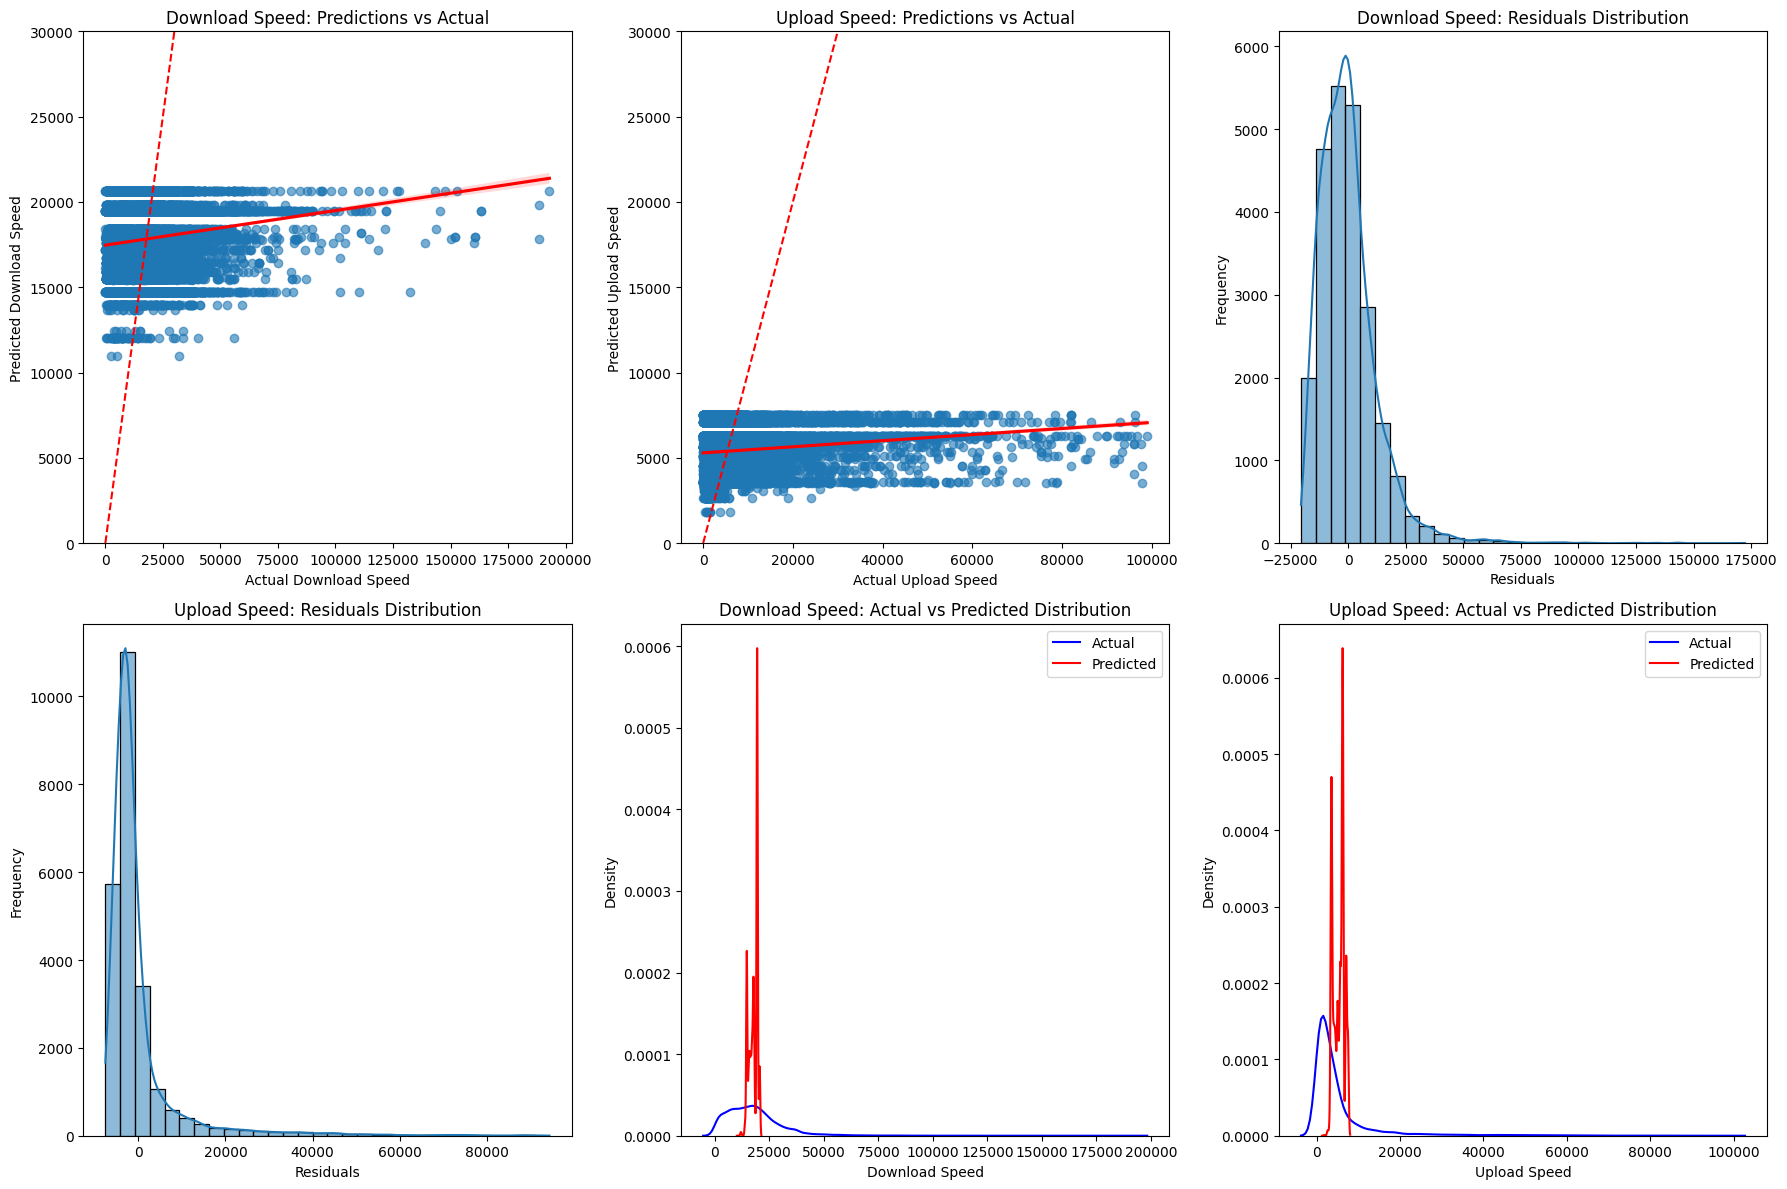

In [ ]:
# Visualize predictions vs actual values with enhancements
plt.figure(figsize=(18, 12))

# Download speed predictions
plt.subplot(2, 3, 1)
sns.regplot(x=y_test_d, y=y_pred_d, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.plot([y_test_d.min(), y_test_d.max()], [y_test_d.min(), y_test_d.max()], 'r--')
plt.xlabel("Actual Download Speed")
plt.ylabel("Predicted Download Speed")
plt.title("Download Speed: Predictions vs Actual")
plt.ylim(0, 30000)  # Set y-axis maximum to 30,000

# Upload speed predictions
plt.subplot(2, 3, 2)
sns.regplot(x=y_test_u, y=y_pred_u, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.plot([y_test_u.min(), y_test_u.max()], [y_test_u.min(), y_test_u.max()], 'r--')
plt.xlabel("Actual Upload Speed")
plt.ylabel("Predicted Upload Speed")
plt.title("Upload Speed: Predictions vs Actual")
plt.ylim(0, 30000)  # Set y-axis maximum to 30,000

# Residuals for download speed
residuals_d = y_test_d - y_pred_d
plt.subplot(2, 3, 3)
sns.histplot(residuals_d, kde=True, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Download Speed: Residuals Distribution")

# Residuals for upload speed
residuals_u = y_test_u - y_pred_u
plt.subplot(2, 3, 4)
sns.histplot(residuals_u, kde=True, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Upload Speed: Residuals Distribution")

# Distribution of actual vs predicted download speeds
plt.subplot(2, 3, 5)
sns.kdeplot(y_test_d, label='Actual', color='blue')
sns.kdeplot(y_pred_d, label='Predicted', color='red')
plt.xlabel("Download Speed")
plt.ylabel("Density")
plt.title("Download Speed: Actual vs Predicted Distribution")
plt.legend()

# Distribution of actual vs predicted upload speeds
plt.subplot(2, 3, 6)
sns.kdeplot(y_test_u, label='Actual', color='blue')
sns.kdeplot(y_pred_u, label='Predicted', color='red')
plt.xlabel("Upload Speed")
plt.ylabel("Density")
plt.title("Upload Speed: Actual vs Predicted Distribution")
plt.legend()

plt.tight_layout()
plt.show()